In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('train_V.csv')
test = pd.read_csv('test_V.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train['Item_Visibility'].where(train['Item_Visibility']==0).value_counts()

0.0    526
Name: Item_Visibility, dtype: int64

In [4]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [5]:
train.isnull().sum()[train.isnull().sum()!=0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [6]:
test.isnull().sum()[test.isnull().sum()!=0]

Item_Weight     976
Outlet_Size    1606
dtype: int64

In [7]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Univariate Analysis

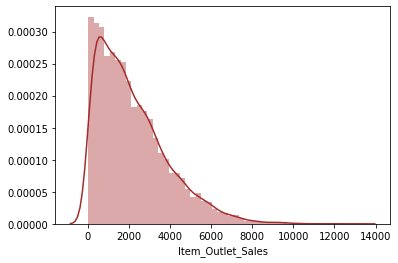

In [8]:
#Target variable
sns.distplot(train['Item_Outlet_Sales'], color = 'brown')

In [9]:
train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

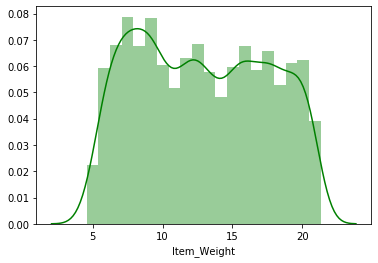

In [10]:
sns.distplot(train['Item_Weight'].dropna(), color = 'green')

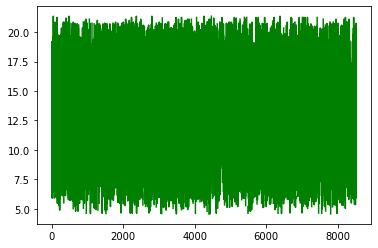

In [11]:
plt.plot(train['Item_Weight'], color = 'green')

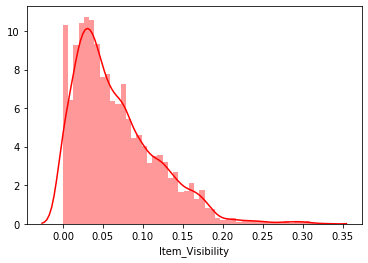

In [12]:
sns.distplot(train['Item_Visibility'], color = 'red')
#Skewed, because bigger products will capture more area in the store and will be more visible compared to small eatables.

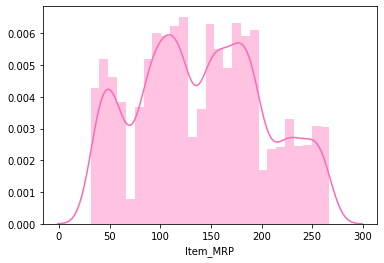

In [13]:
sns.distplot(train['Item_MRP'], color = 'hotpink')
#MRP has 4 different distributions. need to explore further

### SUMMARY - Univariate Analysis

1. Target Variable is skewed in nature with the average sales of 2196 dollars and a sd of 1700 and min sales of 31 dollard and max sales of 14000 dollars.

2. Similary, Item MRP shows 04 different price distributions with min MRP as 31 dollars and max MRP as 266 dollars.

3. Item Weight has no pattern in Univ Plot

4. Item Visibility is skewed in shape meaning some products have a higher visibility in comparison to the rest.


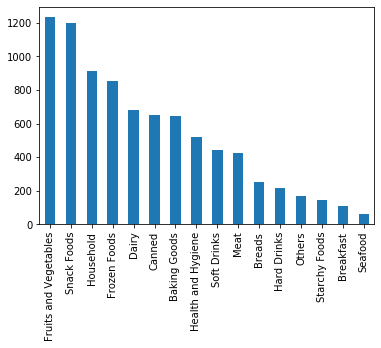

In [14]:
train['Item_Type'].value_counts().plot(kind = 'bar')

In [15]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
train["Item_Fat_Content"][train["Item_Fat_Content"]=="reg"] = "Regular"
train["Item_Fat_Content"][(train["Item_Fat_Content"]=="LF") | (train["Item_Fat_Content"]=="low fat")] = "Low Fat"


C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'})

In [19]:
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

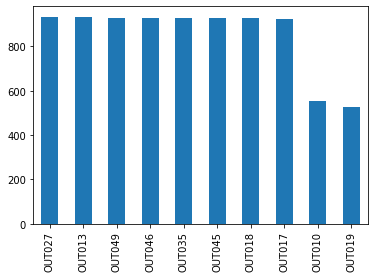

In [20]:
train['Outlet_Identifier'].value_counts().plot(kind = 'bar')

#Outlet 27 has the highest number of stores

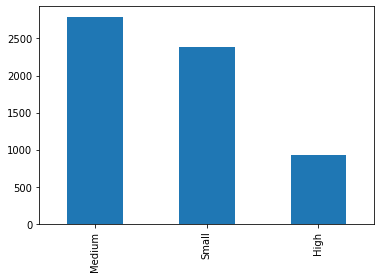

In [21]:
train['Outlet_Size'].value_counts().plot(kind = 'bar')
#med size outlets are most visible. Outlet 27 could be a med size outlet

In [22]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

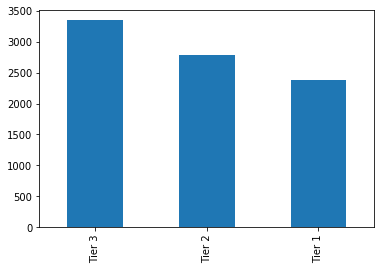

In [23]:
train['Outlet_Location_Type'].value_counts().plot(kind = 'bar')

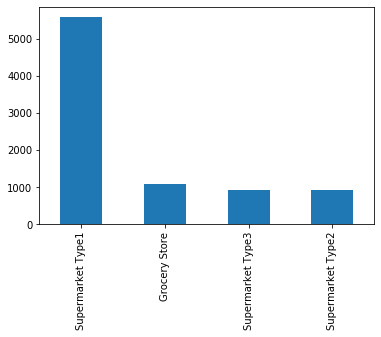

In [24]:
train['Outlet_Type'].value_counts().plot(kind = 'bar')

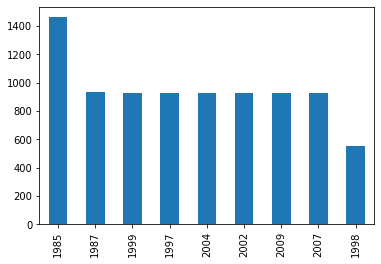

In [25]:
train['Outlet_Establishment_Year'].value_counts().plot(kind = 'bar')

XXX

#### Bivariate Analysis
Analysing the rpedictor vs Target

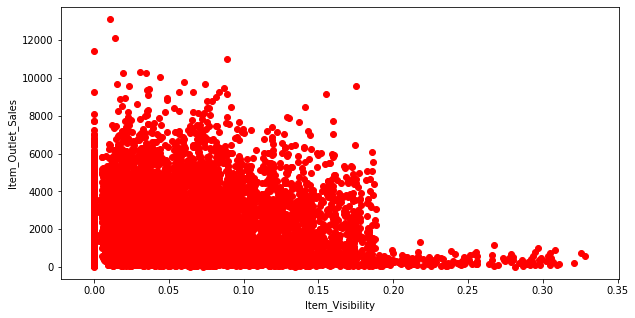

In [26]:
plt.figure(figsize = [10, 5])

plt.scatter(train['Item_Visibility'], train['Item_Outlet_Sales'], color = 'red')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

#high visibility items are sold less also since their price is higher

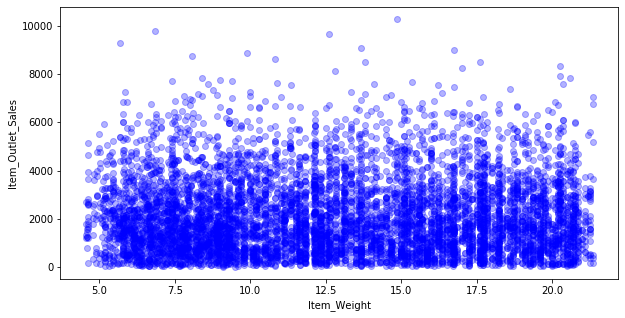

In [27]:
plt.figure(figsize = [10, 5])

plt.scatter(train['Item_Weight'], train['Item_Outlet_Sales'], color = 'blue', alpha = 0.3)
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

#high visibility items are sold less also since their price is higher

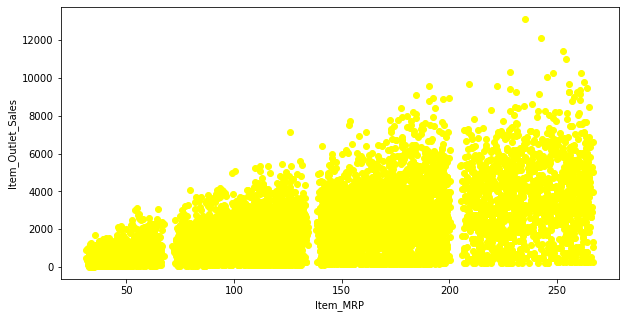

In [28]:
plt.figure(figsize = [10, 5])

plt.scatter(train['Item_MRP'], train['Item_Outlet_Sales'], color = 'yellow')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

#Item MRP is not given for a single item, These are the total prices of certain quantities

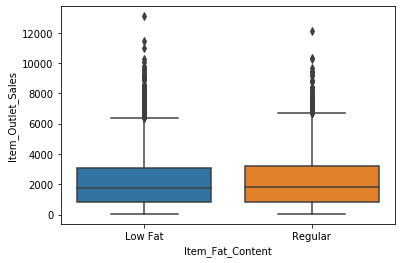

In [29]:
#Bivariate Cat vs Target(Num)

sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data =train)

In [30]:
train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].describe().T

Item_Fat_Content,Low Fat,Regular
count,5517.000000,3006.000000
mean,2157.711534,2224.561170
std,1697.973824,1721.480865
min,33.290000,33.955800
25%,826.257800,857.550400
50%,1765.035800,1844.598900
75%,3050.695600,3198.669650
max,13086.964800,12117.560000


More numbre of products are in teh Low Fat category. Regular products are lesser in number, however the spread is almost the same.

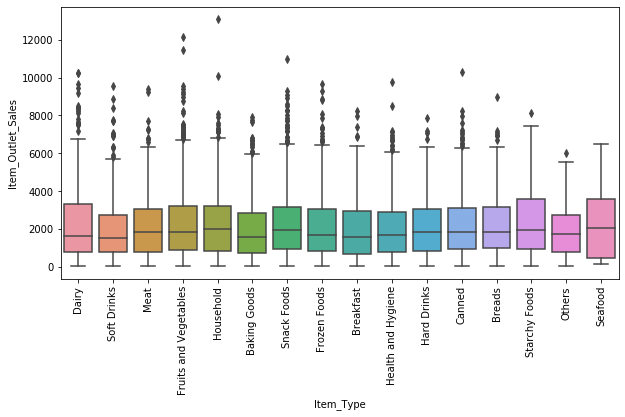

In [31]:
#Item_Type vs sales
plt.figure(figsize = [10,5] )
sns.boxplot(train['Item_Type'], train['Item_Outlet_Sales'])
plt.xticks(rotation = 90)
plt.show()


Inference:
1. Seafood has high price range and its competing with regular items. However the count of seafood sold is the least.
2. Snack food, Dairy, Fruits & Veggies, Household items are selling the most in the category wise.
3. 

In [32]:
#List of item types with sales above 8k.
train.loc[train['Item_Outlet_Sales']>=8000, 'Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Fruits and Vegetables', 'Frozen Foods',
       'Starchy Foods', 'Breads', 'Health and Hygiene', 'Soft Drinks',
       'Canned', 'Household', 'Breakfast', 'Meat'], dtype=object)

In [33]:
train[train['Item_Outlet_Sales']>=8000]['Item_Type'].value_counts()

Dairy                    11
Fruits and Vegetables    10
Snack Foods               9
Frozen Foods              5
Household                 3
Soft Drinks               3
Health and Hygiene        2
Meat                      2
Canned                    2
Starchy Foods             1
Breads                    1
Breakfast                 1
Name: Item_Type, dtype: int64

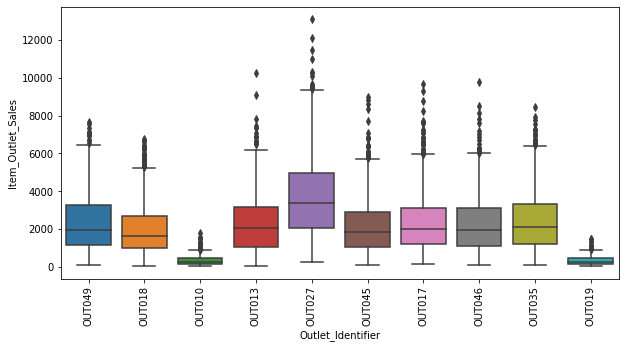

In [34]:

#Outlet_Identifier vs sales
plt.figure(figsize = [10,5] )
sns.boxplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = train)
plt.xticks(rotation = 90)
plt.show()

#Again goes to prove that Outlet 27 has the highest sales. Outlet 10, & 19 are underperforming.

In [35]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

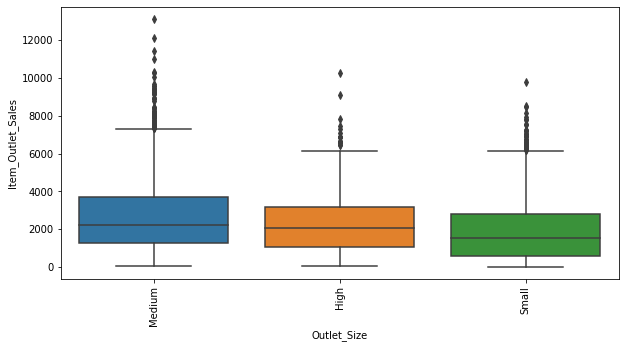

In [36]:

#Outlet Size vs sales
plt.figure(figsize = [10,5] )
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = train)
plt.xticks(rotation = 90)
plt.show()

#Since outlet 27 is the best performing outlets and so is the medium size outlets, highly likely that Outlet 27 is a medium size outlet

In [37]:
train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [38]:
#List of item types with sales above 8k.
train['Item_Type'].where(train['Item_Outlet_Sales']==train['Item_Outlet_Sales'].max()).value_counts()

Household    1
Name: Item_Type, dtype: int64

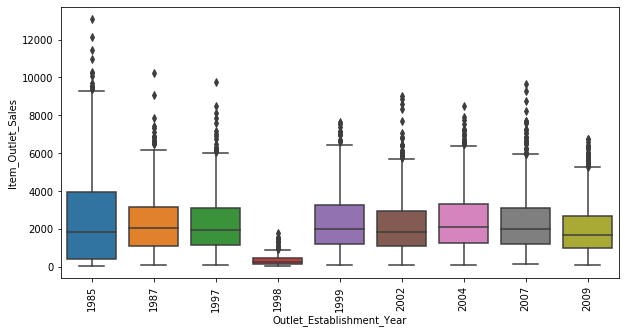

In [39]:

#Outlet Est Year vs sales
plt.figure(figsize = [10,5] )
sns.boxplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = train)
plt.xticks(rotation = 90)
plt.show()


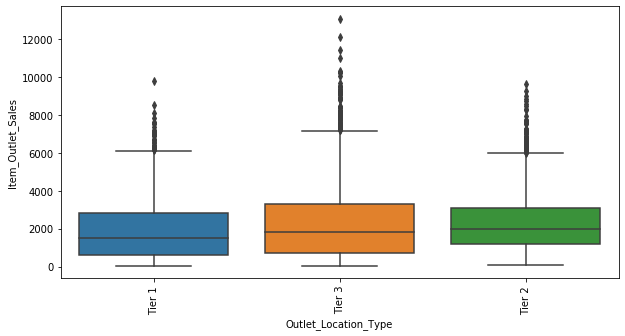

In [40]:

#Outlet Est Year vs sales
plt.figure(figsize = [10,5] )
sns.boxplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data = train)
plt.xticks(rotation = 90)
plt.show()

#Much sales is happening isn Tier3 cities

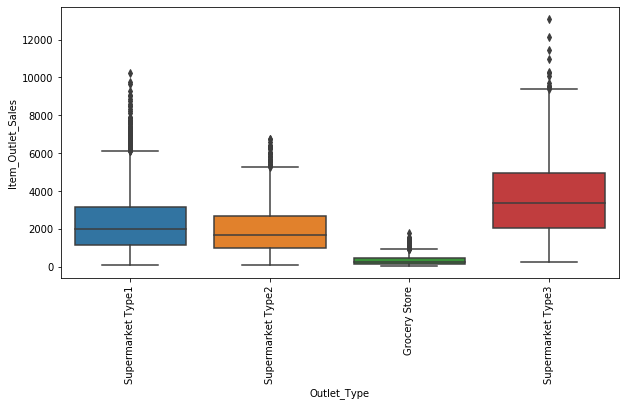

In [41]:

#Outlet Est Year vs sales
plt.figure(figsize = [10,5] )
sns.boxplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', data = train)
plt.xticks(rotation = 90)
plt.show()


Summary of Bivariate Analysis:
    1. Low fat items have higher sales than regular items.
    2. Seafood has a high MRP & low demand
    3. The products that have made money over 8k are -'Snack Foods', 'Dairy', 'Fruits and Vegetables', 'Frozen Foods',
       'Starchy Foods', 'Breads', 'Health and Hygiene', 'Soft Drinks',
       'Canned', 'Household', 'Breakfast', 'Meat']
    4. 1985 store is the oldest store and yet doing very well. Suggetsion - Improve brand perception
    5. Tier 3 cities & Medium Size Outlets with theme of Out27 & Supermarket Type 3 will be a better combination if planning to expand.

In [42]:
train.isnull().sum()[train.isnull().sum()!=0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [43]:
train['Item_Outlet_Sales'].groupby(train['Outlet_Size']).median()

Outlet_Size
High      2050.6640
Medium    2251.0698
Small     1544.6560
Name: Item_Outlet_Sales, dtype: float64

## Treating teh null values for Item_Weight

#### Train data

In [44]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


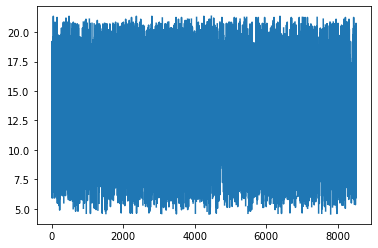

In [45]:
plt.plot(train.Item_Weight)

In [46]:
#Item Type
train.groupby('Item_Identifier')['Item_Weight'].mean()

#Id wise the weights are the same

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
DRB24     8.785
DRB25    12.300
DRB48    16.750
DRC01     5.920
DRC12    17.850
DRC13     8.260
DRC24    17.850
DRC25     5.730
DRC27    13.800
DRC36    13.000
DRC49     8.670
DRD01    12.100
DRD12     6.960
DRD13    15.000
DRD15    10.600
DRD24    13.850
DRD25     6.135
DRD27    18.750
DRD37     9.800
DRD49     9.895
DRD60    15.700
DRE01    10.100
DRE03    19.600
DRE12     4.590
DRE13     6.280
          ...  
NCX05    15.200
NCX06    17.600
NCX17    21.250
NCX18    14.150
NCX29    10.000
NCX30    16.700
NCX41    19.000
NCX42     6.360
NCX53    20.100
NCX54     9.195
NCY05    13.500
NCY06    15.250
NCY17    18.200
NCY18     7.285
NCY29    13.650
NCY30    20.250
NCY41    16.750
NCY42     6.380
NCY53    20.000
NCY54     8.430
NCZ05     8.485
NCZ06    19.600
NCZ17    12.150
NCZ18     7.825
NCZ29    15.000
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: It

In [47]:
train[train.Item_Identifier == 'FDA15']['Item_Weight']

0       9.3
831     9.3
2599    9.3
2643    9.3
4874    9.3
5413    9.3
6696    NaN
7543    9.3
Name: Item_Weight, dtype: float64

In [48]:
train['Item_Weight'].isnull().sum()

1463

In [49]:
#Lambda - SIngle one time loop funstion without the need to savig it in the memory
#Use lambda to fill the values - Mean
#Transform the columns to impute the missing values...
#Approach is to group all the ids and fill the values basis the id.

df=train.copy()

df["Item_Weight"] = df.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))


In [50]:
df['Item_Weight'].isnull().sum()

4

In [51]:
#Location where the missing value exists in the data
locs = train[train['Item_Weight'].isnull()].index

In [52]:
#Ids for these locations
ids = train[train['Item_Weight'].isnull()]['Item_Identifier']

In [53]:
train[train['Item_Weight'].isnull()].head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.12747,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [54]:
for i in locs:
    train.iloc[i,1] = train.loc[train.Item_Identifier==ids[i], "Item_Weight"].mean()

In [55]:
train['Item_Weight'].isnull().sum()

4

Treating the Remaining 4 values

In [56]:
train[train['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [57]:
#Ids for these locations
ids = train[train['Item_Weight'].isnull()]['Item_Type']
ids

927     Frozen Foods
1922     Snack Foods
4187           Dairy
5022    Baking Goods
Name: Item_Type, dtype: object

In [58]:
for i in train[train['Item_Weight'].isnull()].index:
    train.iloc[i,1] = train.loc[train.Item_Type==ids[i], "Item_Weight"].mean()

In [59]:
train['Item_Weight'].isnull().sum()

0

# Test data

In [60]:
#Location where the missing value exists in the data
locs1 = test[test['Item_Weight'].isnull()].index

In [61]:
#Ids for these locations
ids1 = test[test['Item_Weight'].isnull()]['Item_Identifier']

In [62]:
#Break the loop in what you want, You want Index 4 and column 1
#test.iloc[4,1] - iloc - means integer location
#loc in RHS means location.

for i in locs1:
    test.iloc[i,1] = test.loc[test.Item_Identifier==ids1[i], "Item_Weight"].mean()

In [63]:
test[test['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
58,FDL58,NaN,Regular,0.129825,Snack Foods,263.2568,OUT019,1985,Small,Tier 1,Grocery Store
482,FDY57,NaN,Regular,0.120667,Snack Foods,94.6752,OUT027,1985,Medium,Tier 3,Supermarket Type3
882,FDH58,NaN,Low Fat,0.036761,Snack Foods,116.9834,OUT027,1985,Medium,Tier 3,Supermarket Type3
884,FDI45,NaN,Low Fat,0.037399,Fruits and Vegetables,173.1054,OUT027,1985,Medium,Tier 3,Supermarket Type3
1203,FDG50,NaN,Low Fat,0.015198,Canned,89.7146,OUT027,1985,Medium,Tier 3,Supermarket Type3
1297,FDG57,NaN,Low Fat,0.071948,Fruits and Vegetables,48.8034,OUT027,1985,Medium,Tier 3,Supermarket Type3
1300,FDJ09,NaN,Low Fat,0.058112,Snack Foods,45.5744,OUT027,1985,Medium,Tier 3,Supermarket Type3
1571,FDF22,NaN,Low Fat,0.056555,Snack Foods,214.2218,OUT027,1985,Medium,Tier 3,Supermarket Type3
1741,FDI45,NaN,Low Fat,0.065800,Fruits and Vegetables,177.0054,OUT019,1985,Small,Tier 1,Grocery Store
2302,FDF22,NaN,Low Fat,0.099503,Snack Foods,212.5218,OUT019,1985,Small,Tier 1,Grocery Store


In [64]:
#Filling the remaining null values as mean of Item Type
test["Item_Weight"] = test.groupby("Item_Type")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [65]:
test['Item_Weight'].isnull().sum()

0

In [66]:
ids2 = test[test['Item_Weight'].isnull()]['Item_Type']
ids2

Series([], Name: Item_Type, dtype: object)

In [67]:

for i in test[test["Item_Weight"].isnull()].index:
    test.iloc[i,1] = test.loc[test.Item_Type==ids2[i], "Item_Weight"].mean()

In [68]:
test.Item_Weight.isnull().sum()

0

## Treating the null values in Outlet Size

In [69]:
train.isnull().sum()[train.isnull().sum()!=0]

#Type of outlet depends on the location and the type of city

Outlet_Size    2410
dtype: int64

In [70]:
train[train.Outlet_Size.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972


In [71]:
train.Item_Outlet_Sales.groupby(train.Outlet_Size).mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [72]:
#Pattern in the all the data
pd.DataFrame(train.groupby(['Outlet_Size', 'Outlet_Location_Type'])['Outlet_Type'].value_counts())


Outlet_Type
Outlet_Size Outlet_Location_Type Outlet_Type                   
High        Tier 3               Supermarket Type1          932
Medium      Tier 1               Supermarket Type1          930
            Tier 3               Supermarket Type3          935
                                 Supermarket Type2          928
Small       Tier 1               Supermarket Type1          930
                                 Grocery Store              528
            Tier 2               Supermarket Type1          930

1. All Type 1 super markets in Tier 3 have outlet size - High
2. All Grocery STore are small
3. All Tier 2 stores are small
4. Rest are medium

In [73]:
outlets = train.loc[train.Outlet_Size.isnull()]
outlets

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972


In [74]:
#Pattern in the null values
pd.DataFrame(outlets.groupby("Outlet_Location_Type")["Outlet_Type"].value_counts()).T


Outlet_Location_Type,Tier 2,Tier 3
Outlet_Type,Supermarket Type1,Grocery Store
Outlet_Type,1855,555


In [75]:
#On mapping you and concur that all missing values need to be computed with 'SMall' size.
train.loc[train.Outlet_Size.isnull(), 'Outlet_Size']='Small'

In [76]:
train.loc[train.Outlet_Size.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


### Test - Outlet Size

In [77]:
outlets1 = test.loc[test.Outlet_Size.isnull()]
outlets1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1
10,FDT44,16.600,Low Fat,0.103569,Fruits and Vegetables,118.3466,OUT017,2007,NaN,Tier 2,Supermarket Type1
11,FDQ56,6.590,Low Fat,0.105811,Fruits and Vegetables,85.3908,OUT045,2002,NaN,Tier 2,Supermarket Type1
16,FDI57,19.850,Low Fat,0.054135,Seafood,198.7768,OUT045,2002,NaN,Tier 2,Supermarket Type1
19,FDA46,13.600,Low Fat,0.196898,Snack Foods,193.7136,OUT010,1998,NaN,Tier 3,Grocery Store
25,FDX22,6.785,Regular,0.038455,Snack Foods,209.4928,OUT010,1998,NaN,Tier 3,Grocery Store


In [78]:
#Pattern in the null values
pd.DataFrame(outlets1.groupby("Outlet_Location_Type")["Outlet_Type"].value_counts()).T


Outlet_Location_Type,Tier 2,Tier 3
Outlet_Type,Supermarket Type1,Grocery Store
Outlet_Type,1236,370


In [79]:
#On mapping you and concur that all missing values need to be computed with 'SMall' size.
test.loc[test.Outlet_Size.isnull(), 'Outlet_Size']='Small'

In [80]:
test.loc[test.Outlet_Size.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


Now coming to Item Visibility with 0 values

In [81]:
#train['Item_Visibility'] = train.Item_Visibility.transform(lambda x:x.replace(0, x.mean()))

In [82]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [83]:
#With Lambda, you should always groupby to ensure the values have been transformed correctly as a best practice.

train['Item_Visibility'] = train.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x:x.replace(to_replace = 0, 
                                                                                 value = x.mean()))


In [84]:
test['Item_Visibility'].describe()

count    5681.000000
mean        0.065684
std         0.051252
min         0.000000
25%         0.027047
50%         0.054154
75%         0.093463
max         0.323637
Name: Item_Visibility, dtype: float64

In [85]:
#With Lambda, you should always groupby to ensure the values have been transformed correctly as a best practice.

test['Item_Visibility'] = test.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x:x.replace(to_replace = 0, 
                                                                                 value = x.mean()))


## Feature Engineering

1. Extraccting New features from the existing data
2. Transformation of the values
3. Dummying the data or introducing Dummies 

In [86]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


##### Outlet Est year - is actually a categorical colum. The numbers dont make sense for model building.
You can either - have Outlet Age as 2013 - Out Est Year
Or categorize the as 1985 - Vintage Outlet
>1985 and <2000 - Medieval 
>2000 - Latest

In [87]:
train['Outlet_Age'] = 2013-train['Outlet_Establishment_Year']
test['Outlet_Age'] = 2013-test['Outlet_Establishment_Year']

In [88]:
train['Outlet_Identifier']

0       OUT049
1       OUT018
2       OUT049
3       OUT010
4       OUT013
5       OUT018
6       OUT013
7       OUT027
8       OUT045
9       OUT017
10      OUT049
11      OUT046
12      OUT049
13      OUT046
14      OUT013
15      OUT046
16      OUT018
17      OUT049
18      OUT027
19      OUT035
20      OUT013
21      OUT027
22      OUT035
23      OUT019
24      OUT046
25      OUT017
26      OUT035
27      OUT013
28      OUT010
29      OUT019
         ...  
8493    OUT017
8494    OUT017
8495    OUT035
8496    OUT017
8497    OUT035
8498    OUT018
8499    OUT035
8500    OUT017
8501    OUT017
8502    OUT045
8503    OUT035
8504    OUT027
8505    OUT018
8506    OUT018
8507    OUT035
8508    OUT045
8509    OUT010
8510    OUT035
8511    OUT018
8512    OUT013
8513    OUT035
8514    OUT045
8515    OUT018
8516    OUT018
8517    OUT046
8518    OUT013
8519    OUT045
8520    OUT035
8521    OUT018
8522    OUT046
Name: Outlet_Identifier, Length: 8523, dtype: object

In [89]:
def outlets(x):
    if(x!='OUT027'):
        return('OUT027')
    else:
        return ('Others')

In [90]:
train['Outlet_Cat'] = train['Outlet_Identifier'].apply(outlets)
test['Outlet_Cat'] = test['Outlet_Identifier'].apply(outlets)

In [91]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Outlet_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,OUT027
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,OUT027
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,OUT027
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,OUT027
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,OUT027


In [92]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [93]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables', 'Breakfast', 'Breads', 'Seafood']

In [94]:
def perish(x):
    if(x in perishables):
        return('Perishables')
    else:
        return('Non Perishables')

In [95]:
train['Item_Cat'] = train['Item_Type'].apply(perish)
test['Item_Cat'] = test['Item_Type'].apply(perish)

In [96]:
train['Item_Identifier'].unique()
#Trying to combine all FD - Food, DR - Drinks, NC - Non Consumable together

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [97]:
# Extracting the Pattern from ITEM ID
ids = []

for i in train.Item_Identifier:
    ids.append(i[:2])

train["Item_ID"] =pd.Series(ids)


In [98]:
# Extracting the Pattern from ITEM ID
ids = []

for i in test.Item_Identifier:
    ids.append(i[:2])

test["Item_ID"] =pd.Series(ids)


In [99]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [100]:
train.Item_ID.unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [101]:
#Impute Non-edible where item id is Non-consumable
train.loc[train.Item_ID=='NC', 'Item_Fat_Content']='Non Edible'
test.loc[test.Item_ID=='NC', 'Item_Fat_Content']='Non Edible'

In [102]:
#Price per unit
train['Price_per_unit'] = train.Item_MRP/train.Item_Weight
test['Price_per_unit'] = test.Item_MRP/test.Item_Weight

In [103]:
len(train.columns), len(test.columns)

(17, 16)

In [104]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age', 'Outlet_Cat',
       'Item_Cat', 'Item_ID', 'Price_per_unit'],
      dtype='object')

In [105]:
newtrain = train.drop(['Item_Identifier','Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year'], axis = 1)
newtest = test.drop(['Item_Identifier','Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year'], axis = 1)

In [106]:
newtrain.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Outlet_Age', 'Outlet_Cat', 'Item_Cat', 'Item_ID',
       'Price_per_unit'],
      dtype='object')

## Statistical tests

Idea is to find relation between variables and target

#### Hypothesis Tests

Divide the data into cat & num
1. Between numerical columns, the test tha can be done is TTest.
##Since we dont have population Std. Dev, Z-Test cannot be available. Only if the business provides with Mean of Sales of SD of Sales, we vane take that as population data.

Standard Hypothesis Test Statement - Mean of 1 col = Mean of other col

#### Null Hypothesis
H0: Mean of price/unit = Mean of Item Outlet Sales (or avg. is same)

#### Alternate Hypothesis
H1: The mean of Price/unit is different as mean of Item Outlet Sales

Rule: If the P-value is less tha 0.05, then we reject the H0 meaning that the test result is statistically significant.

P-value - Probability of H0 being true.


In [107]:
import scipy.stats as stats

In [108]:
#price per unit vs Item_Outlet Sales
stats.ttest_rel(newtrain['Price_per_unit'], newtrain['Item_Outlet_Sales'])

#The pvalue is not the same, its diff, we reject to H0.

Ttest_relResult(statistic=-117.5285386964518, pvalue=0.0)

In [109]:
# Inf: That the Mean(Price Per Unit) & Mean(TV) is not same. Its different.
# Whether the Item Fat Content and Item Category are Independent of Each Other 
# Or have some relation.

# Ho: That the Categories are Independent of each other meaning happening of one event does 
# not have an impact on the other.

# H1: Ho is False.

# Frequency Table
array = pd.crosstab(newtrain.Item_Fat_Content, newtrain.Item_Cat)

# Apply Chi Square - chi2_Contingency
teststats, pvalue, dof, exp_freq = stats.chi2_contingency(array)

print(pvalue)


2.0907969684852738e-215


In [110]:
newtrain.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Outlet_Age', 'Outlet_Cat', 'Item_Cat', 'Item_ID',
       'Price_per_unit'],
      dtype='object')

In [111]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model1 = ols("Item_Outlet_Sales~Item_Fat_Content+Outlet_Size+Outlet_Location_Type+Outlet_Type+Outlet_Cat+Item_Cat+Item_ID",
           data = newtrain).fit()


In [112]:
anova_tbl = sm.stats.anova_lm(model1)
anova_tbl


,df,sum_sq,mean_sq,F,PR(>F)
Item_Fat_Content,2.0,9.201502e+06,4.600751e+06,2.080018,1.249914e-01
Outlet_Size,2.0,1.184389e+09,5.921943e+08,267.733478,1.721921e-113
Outlet_Location_Type,2.0,1.419529e+09,7.097646e+08,320.887499,4.410837e-135
Outlet_Type,3.0,3.343020e+09,1.114340e+09,503.797631,2.264478e-301
Outlet_Cat,1.0,5.206906e+06,5.206906e+06,2.354064,1.249941e-01
Item_Cat,1.0,1.747023e+07,1.747023e+07,7.898364,4.959254e-03
Item_ID,2.0,2.244755e+07,1.122377e+07,5.074314,6.274312e-03
Residual,8511.0,1.882531e+10,2.211880e+06,NaN,NaN


In [126]:
anova_tbl['PR(>F)']>0.05

Item_Weight        True
Price_per_unit    False
Item_MRP          False
Residual          False
Name: PR(>F), dtype: bool

In [114]:
model = ols("Item_Outlet_Sales~Item_Weight+Price_per_unit+Item_MRP",
           data = newtrain).fit()

anova_tbl = sm.stats.anova_lm(model)
anova_tbl["PR(>F)"][:-1]<0.05 # Remove Item Weight


Item_Weight       False
Price_per_unit     True
Item_MRP           True
Name: PR(>F), dtype: bool

In [115]:
finaltrain = newtrain.drop(["Item_Weight", "Item_Fat_Content", "Outlet_Cat"], axis = 1)
finaltest = newtest.drop(["Item_Weight", "Item_Fat_Content", "Outlet_Cat"], axis = 1)
#Removed the columns where the Pvlaue wasnt significant

In [116]:
#Get dummies
dummytrain = pd.get_dummies(finaltrain)
dummytest = pd.get_dummies(finaltest)
dummytrain.shape, dummytest.shape

((8523, 20), (5681, 19))

### Base model

In [117]:
sample = pd.read_csv('Submission.csv')
sample.head()

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1636.244023
1,1,FDW14,OUT017,1409.355910
2,2,NCN55,OUT010,710.594286
3,3,FDQ58,OUT017,2355.184955
4,4,FDY38,OUT027,5857.916205


In [118]:
solution = pd.DataFrame({"Item_Identifier": sample.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": train.Item_Outlet_Sales.mean()})
solution.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2181.288914
1,FDW14,OUT017,2181.288914
2,NCN55,OUT010,2181.288914
3,FDQ58,OUT017,2181.288914
4,FDY38,OUT027,2181.288914


In [119]:
solution.to_csv('Base_Model.csv', index= False)

## Decision Tree Regression

In [120]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

# Fit the Model on the Data and predict it

# Defined the Xtrain and YTrain
X = dummytrain.drop("Item_Outlet_Sales", axis = 1)
y = dummytrain.Item_Outlet_Sales

# Fit and Predict
pred = dtree.fit(X,y).predict(dummytest)

# Export for submission

solution = pd.DataFrame({"Item_Identifier": sample.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": pred})

# Export it in csv
solution.to_csv("treebased.csv", index = False) # $1593.69 is the RMSE


In [121]:
#Stacked model
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor,GradientBoostingRegressor

from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression

def stackedmodels():
    models = dict()
    models['LR'] = LinearRegression()
    models['Lasso'] = Lasso()
    models['Ridge'] = Ridge()
    models['Tree'] = DecisionTreeRegressor()
    models['RF'] = RandomForestRegressor()
    models['Bagg'] = BaggingRegressor()
    models['GBR'] = GradientBoostingRegressor()
    models['XGB'] = XGBRegressor()
    return(models)

In [122]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

def eval_models(model):
    cross_v= RepeatedKFold(n_splits=10, random_state=1)
    scores = -cross_val_score(model, X, y, scoring = "neg_mean_absolute_error",
                            cv = cross_v, error_score="raise", n_jobs = -1)
    return(scores)

    

In [123]:
# Apply Loop so that scores can be generated for all the Models

models = stackedmodels()

# Evaluations
result, names = list(), list()

for name, model in models.items():
    scores = eval_models(model) # Evaluation Funct that we have created
    result.append(scores) # Save the Cross Val Score
    names.append(name) # Save the Name of the Model
    print(">%s %3.f (%.3f)" % (name, scores.mean(), scores.std()))


>LR 838 (25.796)
>Lasso 838 (25.650)
>Ridge 838 (25.773)
>Tree 1063 (38.608)
>RF 794 (28.436)
>Bagg 823 (29.181)
>GBR 759 (24.942)
>XGB 809 (28.460)


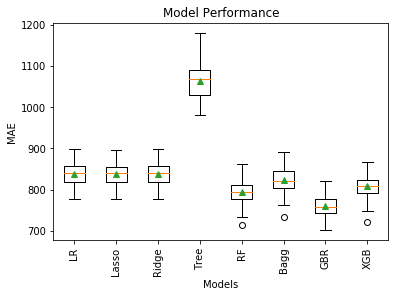

In [124]:
plt.boxplot(result, labels = names, showmeans = True)
plt.xticks(rotation = 90)
plt.ylabel("MAE")
plt.xlabel("Models")
plt.title("Model Performance")
plt.show()

In [125]:
from xgboost.sklearn import XGBRegressor
GBR = GradientBoostingRegressor(n_estimators = 25)

# Defined the Xtrain and YTrain
X = dummytrain.drop("Item_Outlet_Sales", axis = 1)
y = dummytrain.Item_Outlet_Sales

# Fit and Predict
pred_GBR = GBR.fit(X,y).predict(dummytest)

# Export for submission

solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": pred_GBR})

# Export it in csv
solution.to_csv("GBRMODEL.csv", index = False) # 1152.79 RMSE